Shah Wali Ullah Baig

# **Load Datasets:**

In [31]:
import pandas as pd

# Load the datasets
# Assuming the datasets are in CSV format. If not, adjust the read function accordingly (e.g., read_excel for Excel files).

customer = pd.read_csv('/content/contactform.csv', header=None, encoding='ISO-8859-1')
product = pd.read_csv('/content/products.csv', header=None, encoding='ISO-8859-1')


# **Dataset Cleaning:**

## **Show Dataset:**

In [32]:
# Display the first few rows of each dataset
print(customer.head())
print(product.head())

   0  1                                             2            3        4   \
0  18  1                            Movado Date Silver   Wm-Mov-409   Noman    
1  19  1  Tag Heuer Grand Carrera Calibre 36 Exclusive   Wm-Tag-266    fahad   
2  20  1                           Rolex Daytona Stone   Wm-Rol-317    fahad   
3  21  1                 Montblanc FlyBack Chronograph  Wm-Mont-701    fahad   
4  22  1     Tag Heuer Grand Carrera Calibre 36 Silver   Wm-Tag-264  hassan    

      5                        6            7       8   \
0  Ahmed  nomisupersoft@gmail.com  03422889053  3217.0   
1   shah  fahad.rizvi@hotmail.com  03458099560  3217.0   
2   syed  fahad.rizvi@hotmail.com  03458099560  3217.0   
3  kazmi  fahad.rizvi@hotmail.com  03458099560  3217.0   
4  faraz  fahad.rizvi@hotmail.com  03458099560  3217.0   

                                      9        10           11  \
0                            Noman Ahmed  karachi  02134545454   
1                      a-4 saiban cent

In [33]:
# Get a concise summary of the datasets
print(customer.info())
print(product.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708 entries, 0 to 2707
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2708 non-null   object 
 1   1       2706 non-null   object 
 2   2       1989 non-null   object 
 3   3       126 non-null    object 
 4   4       2696 non-null   object 
 5   5       2655 non-null   object 
 6   6       2573 non-null   object 
 7   7       2704 non-null   object 
 8   8       2532 non-null   float64
 9   9       2682 non-null   object 
 10  10      2636 non-null   object 
 11  11      1256 non-null   object 
 12  12      2703 non-null   object 
 13  13      2703 non-null   float64
dtypes: float64(2), object(12)
memory usage: 296.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       797 non-null    object 
 1   1       791 non-null

## **Identifying Useless Columns:**

In [34]:
# Identify columns with a single unique value or too many missing values in dataset1
for col in customer.columns:
    if customer[col].nunique() <= 1 or customer[col].isnull().sum() / len(customer) > 0.9:
        print(f"Column {col} is potentially useless in dataset1.")

# Repeat for dataset2
for col in product.columns:
    if product[col].nunique() <= 1 or product[col].isnull().sum() / len(product) > 0.9:
        print(f"Column {col} is potentially useless in dataset2.")

Column 3 is potentially useless in dataset1.
Column 10 is potentially useless in dataset2.
Column 29 is potentially useless in dataset2.


## **Removing Useless Columns:**

In [35]:
# Assuming columns 3 are useless in dataset1, and columns 10 and 29 are useless in dataset2

customer.drop(columns=[3], inplace=True)
product.drop(columns=[10, 29], inplace=True)

## **Naming the columns:**

In [36]:
import pandas as pd

# Increase the number of visible columns in notebook outputs
pd.set_option('display.max_columns', None)

# Now, when you use .head() or similar methods, more columns will be shown (depending on your screen size and column sizes)
print(product.head())

    0           1                                         2    3    4     5   \
0  128  Rw-Tag-206         Tagheuer 100 Mikrograph Rose Gold  1.0  1.0  10.0   
1  292  Rw-Tag-268        Tag Heuer Monaco 360 Ls Calibre 12  1.0  1.0  10.0   
2  246  WmL-Tag-01           Formula 1 Maria Sharapova White  2.0  1.0  21.0   
3  318  Wm-Rad-506                         Rado Jubile 8332   1.0  1.0  13.0   
4  319  Wm-Rad-507  Rado True Special Edition Ceramic Watch   1.0  1.0  13.0   

       6        7                   8   \
0  7499.0     0.00  12151009930400.jpg   
1  8499.0  7499.00  25124781980000.jpg   
2  4199.0  3999.00  16972563234100.jpg   
3  5999.0  5499.00  14206965461550.jpg   
4  5499.0     0.00  27629913748050.jpg   

                                         9           11 12    13    14 15  \
0               Tagheuer Carrera Mikrograph  2013-03-09  1  0.00  0.00  1   
1        Tag Heuer Monaco 360 Ls Calibre 12  2013-07-26  1  0.00  0.00  1   
2       Tag Heuer Formula 1 Maria S

In [37]:
# Inspect unique values or a sample to guess the column's meaning
print(product.sample(5))

       0           1                                                  2    3   \
774  1183  Wm-Tag-374                 Tag Heuer Carrera 1887 Full Black   1.0   
106   356  Wm-Omg-605           Omega Seamaster Planet Ocean Chronograph  1.0   
783  1128  Wm-Mov-443                                 Movado Sheffer  SS  1.0   
322   587  Wm-Mov-418                 Movado 2235 Round White Dial Watch  1.0   
76    327  Wm-Cas-110  Casio Edifice Choronograph EF-552D-1AV (Original)  1.0   

      4     5       6     7                   8   \
774  1.0  10.0  8999.0  0.00   3227408580000.jpg   
106  1.0  12.0  7999.0  0.00  24746099160000.jpg   
783  1.0   1.0  4499.0  0.00   5906011360000.jpg   
322  1.0   1.0  1499.0  0.00  18475428840000.jpg   
76   1.0  22.0  7999.0  0.00  12808727800000.jpg   

                                                    9           11 12    13  \
774                 Tag Heuer Carrera 1887 Full Black   2015-04-20  1  0.00   
106           Omega Seamaster Planet Ocean

### **Customer Dataset details:**

Column 0: This appears to be a unique identifier for each row, possibly an order or transaction ID. Suggested name: OrderID.

Column 1: This column also seems to be related to identification, possibly a sequential or unique identifier for transactions. Given its similarity to Column 0 in being a unique or sequential identifier but not exactly matching it, this might represent a related but distinct concept, such as a customer interaction ID. Suggested name: Since its purpose is a bit unclear without further context, we'll call it TransactionID for now, but you might want to investigate its meaning further.

Column 2: Seems to be a product name or description. Suggested name: ProductName.

Column 4: Likely the first name of the customer. Suggested name: FirstName.

Column 5: Likely the last name of the customer or another name field. Suggested name: LastName.

Column 6: This is clearly an email address. Suggested name: Email.

Column 7: Appears to be a phone number. Suggested name: PhoneNumber.

Column 8: This column is not very clear from the provided data, but it may represent a location ID, store ID, or something similar, given that it's numeric and does not vary much across entries. Suggested name: LocationID.

Column 9: This column contains addresses. Suggested name: Address.

Column 10: Represents a city or location name. Suggested name: City.

Column 11: Another phone number, possibly a secondary contact number. Suggested name: SecondaryPhoneNumber.

Column 12: Looks like a timestamp, possibly indicating the date and time of the order or customer interaction. Suggested name: DateTime.

Column 13: This could represent an amount, possibly the transaction amount or an ID related to financials. Suggested name: Amount.

customer.columns = ['OrderID', 'TransactionID', 'ProductName', 'FirstName', 'LastName',
                    'Email', 'PhoneNumber', 'LocationID', 'Address', 'City',
                    'SecondaryPhoneNumber', 'DateTime', 'Amount']


In [38]:
# Assuming 'customer' is your DataFrame
customer.columns = [
    'OrderID',                # Column 0
    'TransactionID',          # Column 1
    'ProductName',            # Column 2
    # Column 3 is missing in your sample; assuming it was removed or not provided
    'FirstName',              # Column 4
    'LastName',               # Column 5
    'Email',                  # Column 6
    'PhoneNumber',            # Column 7
    'LocationID',             # Column 8
    'Address',                # Column 9
    'City',                   # Column 10
    'SecondaryPhoneNumber',   # Column 11
    'DateTime',               # Column 12
    'Amount'                  # Column 13
]

# Display the DataFrame with new column names to verify

customer.head()

,OrderID,TransactionID,ProductName,FirstName,LastName,Email,PhoneNumber,LocationID,Address,City,SecondaryPhoneNumber,DateTime,Amount
0,18,1,Movado Date Silver,Noman,Ahmed,nomisupersoft@gmail.com,03422889053,3217.0,Noman Ahmed,karachi,02134545454,2013-03-01 20:41:58,39.0
1,19,1,Tag Heuer Grand Carrera Calibre 36 Exclusive,fahad,shah,fahad.rizvi@hotmail.com,03458099560,3217.0,a-4 saiban center,karachi,NaN,2013-03-01 23:09:44,40.0
2,20,1,Rolex Daytona Stone,fahad,syed,fahad.rizvi@hotmail.com,03458099560,3217.0,a-4 saiban,karachi,NaN,2013-03-01 23:19:12,41.0
3,21,1,Montblanc FlyBack Chronograph,fahad,kazmi,fahad.rizvi@hotmail.com,03458099560,3217.0,a-4 saiban center 68 gulshan-e-iqbal,karachi,NaN,2013-03-02 06:57:16,42.0
4,22,1,Tag Heuer Grand Carrera Calibre 36 Silver,hassan,faraz,fahad.rizvi@hotmail.com,03458099560,3217.0,c-24 university of karachi staff town,karachi,NaN,2013-03-02 07:13:34,43.0


### **Product Dataset Details:**

ProductID: Unique identifier for each product.

SKU: Stock Keeping Unit, a unique code for each product variant.

ProductName: The name of the product.

CategoryID: Identifier for the product category.

SubcategoryID: Identifier for the product subcategory.

StockLevel: The quantity of stock available.

Price: The regular price of the product.

DiscountedPrice: The price of the product after discounts are applied.

ProductImage: The filename of the product image.

ProductDescription: A brief description of the product.

(Column 10 is missing in the sample provided; it could be an unused or deleted column.)

ReleaseDate: The date the product was released or added to the store.

StatusFlag: A flag indicating the status of the product (e.g., 1 for active).

DiscountAmount: The amount of discount provided on the product.

AdditionalDiscount: Any additional discount that applies to the product.

AvailabilityFlag: A flag indicating the availability of the product.

ModelNumber: The model number of the product.

MovementType: Information about the watch movement type, if applicable.

CaseMaterial: The material of the product case.

GlassType: The type of glass or crystal used in the product.

DialType: The type of the product dial.

StrapType: The type of strap used for the product.

ClosureType: The type of closure used for the product.

Dimensions: The dimensions of the product.

Weight: The weight of the product.

FrontImage: The filename of the front image of the product.

SideImage: The filename of the side image of the product (if applicable).

BackImage: The filename of the back image of the product (if applicable).

(Column 29 is missing in the sample provided; it could be an unused or deleted column.)

SpecialOffer: Any special offers related to the product.

OfferFlag1: A flag related to a specific offer or promotion.

OfferFlag2: Another flag related to a different offer or promotion.

SeoName: A search engine optimized name for the product.

product.columns = [
    'ProductID', 'SKU', 'ProductName', 'CategoryID', 'SubcategoryID', 'StockLevel',
    'Price', 'DiscountedPrice', 'ProductImage', 'ProductDescription', # Skipping column 10
    'ReleaseDate', 'StatusFlag', 'DiscountAmount', 'AdditionalDiscount', 'AvailabilityFlag',
    'ModelNumber', 'MovementType', 'CaseMaterial', 'GlassType', 'DialType',
    'StrapType', 'ClosureType', 'Dimensions', 'Weight', 'FrontImage',
    'SideImage', 'BackImage', # Skipping column 29
    'SpecialOffer', 'OfferFlag1', 'OfferFlag2', 'SeoName'
]


In [39]:
product.columns = [
    'ProductID', 'SKU', 'ProductName', 'CategoryID', 'SubcategoryID', 'StockLevel',
    'Price', 'DiscountedPrice', 'ProductImage', 'ProductDescription',
    'ReleaseDate', 'StatusFlag1', 'DiscountAmount', 'AdditionalDiscount', 'AvailabilityFlag',
    'ModelNumber', 'MovementType', 'CaseMaterial', 'GlassType', 'DialType',
    'StrapType', 'ClosureType', 'Dimensions', 'Weight', 'FrontImage',
    'SideImage', 'BackImage', 'AdditionalImage1', 'AdditionalImage2', 'SpecialOfferText',
    'OfferFlag1', 'OfferFlag2'
]

#Display

product.head()

,ProductID,SKU,ProductName,CategoryID,SubcategoryID,StockLevel,Price,DiscountedPrice,ProductImage,ProductDescription,ReleaseDate,StatusFlag1,DiscountAmount,AdditionalDiscount,AvailabilityFlag,ModelNumber,MovementType,CaseMaterial,GlassType,DialType,StrapType,ClosureType,Dimensions,Weight,FrontImage,SideImage,BackImage,AdditionalImage1,AdditionalImage2,SpecialOfferText,OfferFlag1,OfferFlag2
0,128,Rw-Tag-206,Tagheuer 100 Mikrograph Rose Gold,1.0,1.0,10.0,7499.0,0.00,12151009930400.jpg,Tagheuer Carrera Mikrograph,2013-03-09,1,0.00,0.00,1,203,WM-Tag-237,Quartz Movement (Made in Japan) with chronogra...,Higest quality electroplated Stainless steel,Double Anti-reflective curved sapphire crystal,Higest quality electroplated Stainless steel w...,Geniune Brown Leather,Non Screwed,Diameter 41mm / Height 13mm,125.13gm,53540000.jpg,33080763500000.jpg,340380000.jpg,NaN,0.0,0.0,Tagheuer-100-Mikrograph-Rose-Gold
1,292,Rw-Tag-268,Tag Heuer Monaco 360 Ls Calibre 12,1.0,1.0,10.0,8499.0,7499.00,25124781980000.jpg,Tag Heuer Monaco 360 Ls Calibre 12,2013-07-26,1,0.00,0.00,1,263,Wm-Tag-268,Japanese Quartz movement with chronograph,Solid electro-plated stainless steel,Double Anti-reflective curved sapphire crystal...,High quality Stainless steel,Handsewn Alligators leather strap with black S...,Normal With Tagheuer Logo,Diameter 40mm / Height 13mm,136 gms,35548739940000.jpg,NaN,23029861200000.jpg,Save Rs 1000,1.0,0.0,TagHeuerMonaco360LsCalibre12
2,246,WmL-Tag-01,Formula 1 Maria Sharapova White,2.0,1.0,21.0,4199.0,3999.00,16972563234100.jpg,Tag Heuer Formula 1 Maria Sharapova,2013-09-10,1,0.00,0.00,1,202,WmL-Tag-01,Japanese Quartz Movement,Solid Matt Finish Highest grade Stainless Steel,Saphire Crystal,Solid Matt Finish Highest grade Stainless Steel,Fabric Brown Leather,normal with logo,Ladies,NaN,12735452520000.jpg,4588530180000.jpg,20316298200000.jpg,NaN,0.0,0.0,Formula1MariaSharapovaWhite
3,318,Wm-Rad-506,Rado Jubile 8332,1.0,1.0,13.0,5999.0,5499.00,14206965461550.jpg,Rado Jubile 8332,2014-02-08,1,0.00,0.00,1,509,Wm-Rad-508,Quartz Movement (Made in Japan),"High tech Ceramic,scratch-resistant",Domed scratch-resistant sapphire crystal with ...,High quality PVC / Plastic,High tech Ceramic unbreakable Bracelet,Screwed into the tube of the case,39 mm,--,37413556800000.jpg,NaN,NaN,NaN,0.0,1.0,RadoJubile8332
4,319,Wm-Rad-507,Rado True Special Edition Ceramic Watch,1.0,1.0,13.0,5499.0,0.00,27629913748050.jpg,Rado True Special Edition Ceramic Watch,2014-12-06,1,0.00,0.00,1,510,Wm-Rad-507,Japanese Quartz Movement,"High tech Ceramic,scratch-resistant",Domed scratch-resistant sapphire crystal with ...,High quality PVC / Plastic,High tech Ceramic unbreakable Bracelet,Normal,40 mm,NaN,NaN,NaN,NaN,NaN,0.0,0.0,RadoTrueSpecialEditionCeramicWatch


## **Further Cleaning:**


### **Cleaning the rows of datasets:**

In [40]:
import pandas as pd
import numpy as np

# For the 'customer' DataFrame
# Replace empty strings with NaN
customer.replace('', np.nan, inplace=True)
# Drop rows with any NaN values
customer.dropna(inplace=True)

# For the 'product' DataFrame (assuming the DataFrame name is 'product')
# Replace empty strings with NaN
product.replace('', np.nan, inplace=True)
# Drop rows with any NaN values
product.dropna(inplace=True)

# **Analysis of Customer Dataset:**

In [ ]:
!pip install pandas matplotlib seaborn plotly

### Which city have the highest Number of Orders per City?

This analysis will help identify which cities have the highest demand for products. It could be crucial for marketing and supply chain optimizations.

In [44]:
import pandas as pd
import plotly.express as px

# Assuming the dataframe is loaded into a variable named customer

# Aggregate the data
orders_per_city = customer['City'].value_counts().reset_index()
orders_per_city.columns = ['City', 'Number of Orders']

# Create an interactive bar chart
fig = px.bar(orders_per_city, x='Number of Orders', y='City', orientation='h',
             title='Number of Orders per City',
             labels={'City': 'City', 'Number of Orders': 'Number of Orders'},
             hover_data={'City': True, 'Number of Orders': True})

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


### Which Order Amount have highest count show through Distribution?



Understanding the distribution of order amounts can provide insights into customer spending behavior.

In [45]:
# Assuming Amount is the column representing the order amount
fig = px.histogram(customer, x='Amount', nbins=50,
                   title='Distribution of Order Amounts',
                   labels={'Amount': 'Order Amount'})
fig.update_traces(marker_color='indianred', marker_line_color='black',
                  marker_line_width=1.5, opacity=0.6)
fig.show()


### At which dates number of orders increases?

This visualization aims to show the trend of orders over time, indicating growth, seasonality, or specific patterns.

In [46]:
# Assuming DateTime is the column with order dates
customer['DateTime'] = pd.to_datetime(customer['DateTime'])

# Aggregate data by date
orders_over_time = customer.groupby(customer['DateTime'].dt.date).size().reset_index(name='Number of Orders')

# Create a line chart
fig = px.line(orders_over_time, x='DateTime', y='Number of Orders',
              title='Orders Over Time',
              labels={'DateTime': 'Date', 'Number of Orders': 'Number of Orders'})
fig.update_traces(line_color='royalblue', mode='lines+markers')
fig.show()

### Which subcategory has the highest average price?



Explanation: This analysis identifies premium subcategories. A bar chart effectively highlights the average price differences among subcategories.

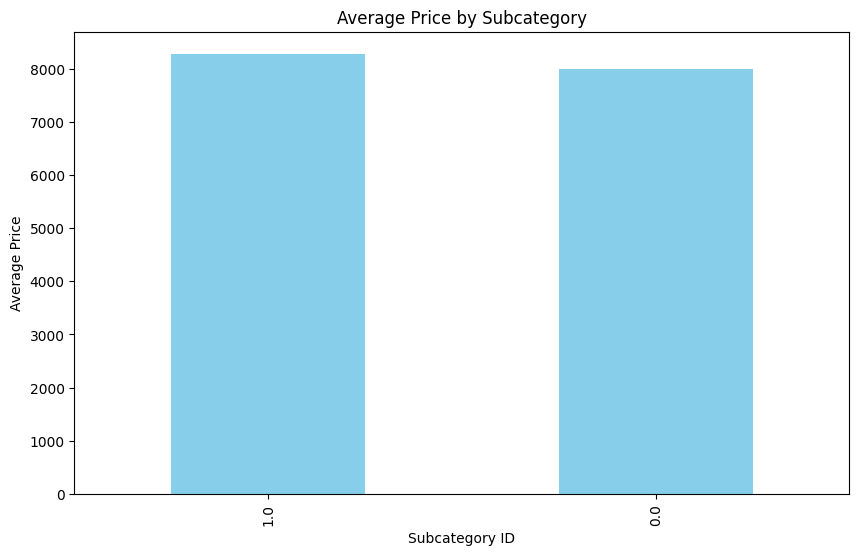

In [48]:
# Assuming there's a 'SubcategoryID' and a 'Price' column
avg_price_subcategory = product.groupby('SubcategoryID')['Price'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
avg_price_subcategory.plot(kind='bar', color='skyblue')
plt.title('Average Price by Subcategory')
plt.xlabel('Subcategory ID')
plt.ylabel('Average Price')
plt.show()

### What is the distribution of stock levels for products?

Explanation: Understanding stock levels helps with inventory management. A histogram with KDE provides insights into the distribution of stock levels, showing commonality and outliers.

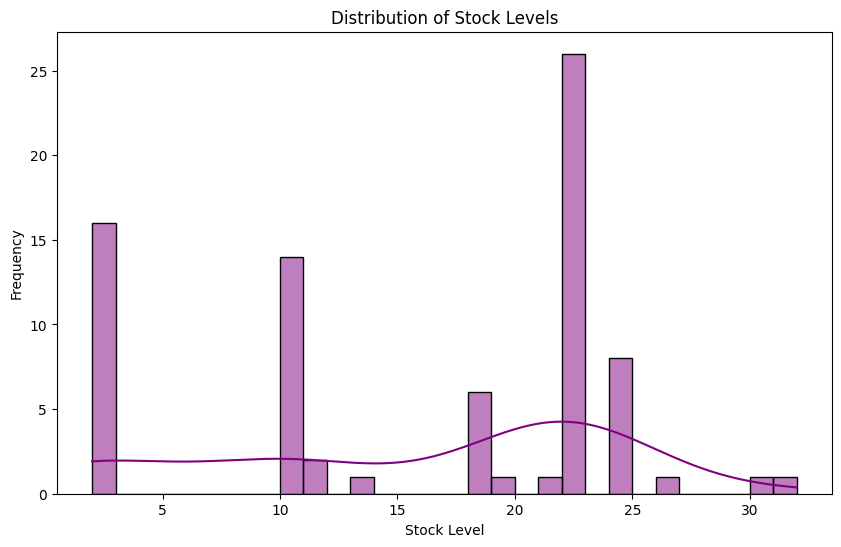

In [49]:
# Assuming there's a 'StockLevel' column
plt.figure(figsize=(10, 6))
sns.histplot(product['StockLevel'], bins=30, kde=True, color='purple')
plt.title('Distribution of Stock Levels')
plt.xlabel('Stock Level')
plt.ylabel('Frequency')
plt.show()

### How does the discounted price distribution compare to the original price distribution?

Explanation: This comparison identifies the effect of discounts on pricing. KDE plots are used for a smooth representation of distribution densities.

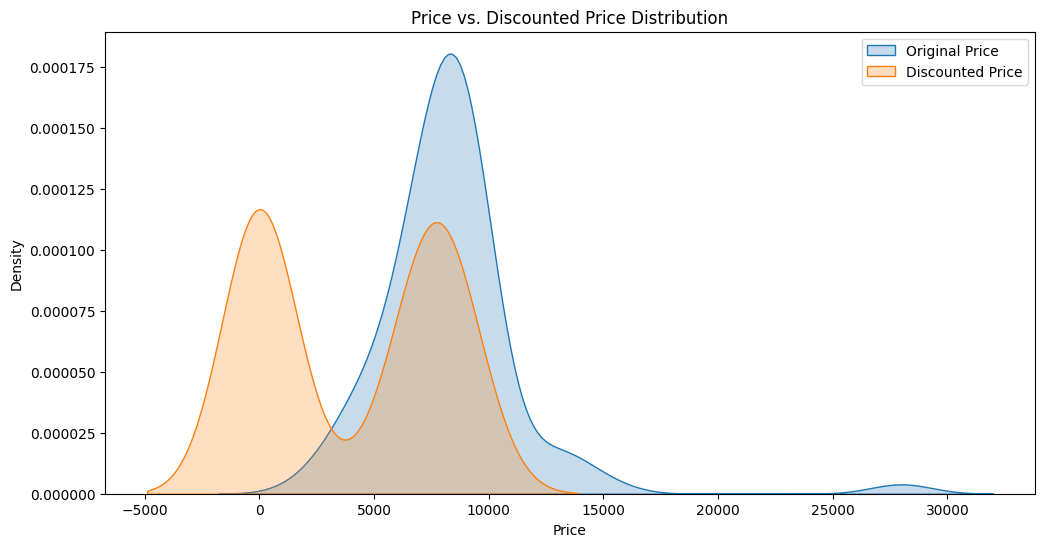

In [55]:
# Convert 'Price' and 'DiscountedPrice' to numeric, just in case they are not
product['Price'] = pd.to_numeric(product['Price'], errors='coerce')
product['DiscountedPrice'] = pd.to_numeric(product['DiscountedPrice'], errors='coerce')

# Now plot using the updated parameter and ensuring the data is appropriate for a KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(product['Price'], label='Original Price', fill=True)
sns.kdeplot(product['DiscountedPrice'], label='Discounted Price', fill=True)
plt.title('Price vs. Discounted Price Distribution')
plt.xlabel('Price')
plt.legend()
plt.show()

### What is the relationship between stock level and price?

Explanation: This analysis checks if stock levels affect product pricing. A scatter plot is ideal for showing relationships between two quantitative variables.

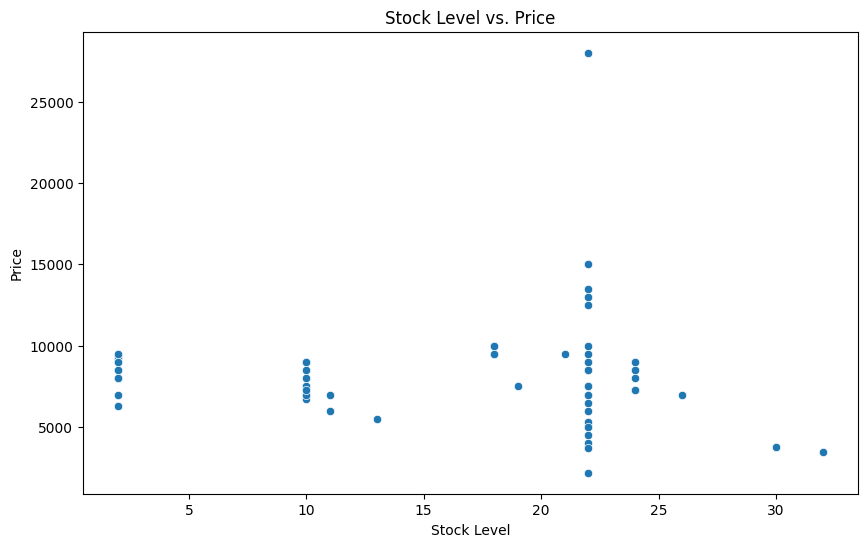

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='StockLevel', y='Price', data=product)
plt.title('Stock Level vs. Price')
plt.xlabel('Stock Level')
plt.ylabel('Price')
plt.show()

### How have product prices changed over time?

Explanation: This trend analysis identifies price evolution over time. A line graph is used for its effectiveness in showing changes in a metric over intervals.

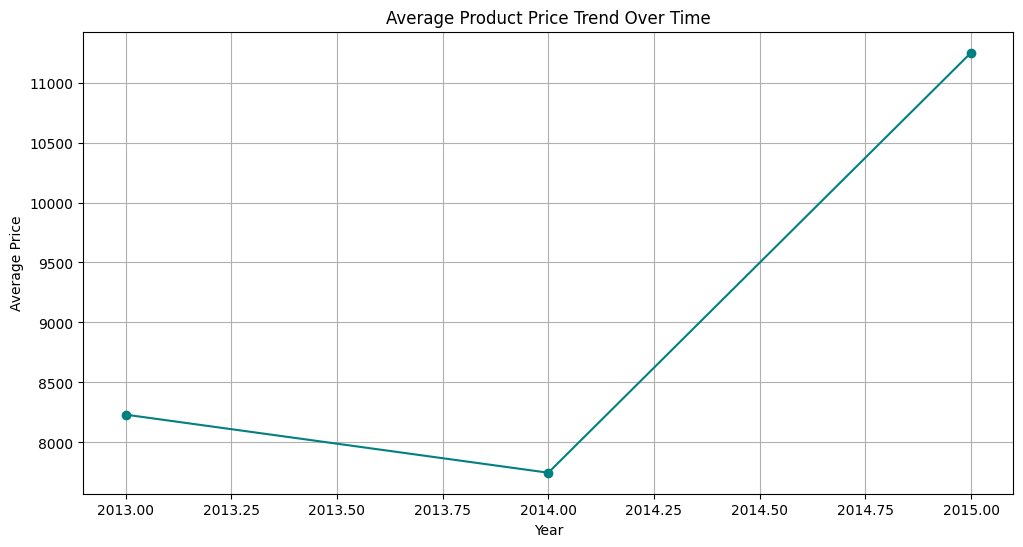

In [54]:
# Convert 'ReleaseDate' to datetime format
product['ReleaseDate'] = pd.to_datetime(product['ReleaseDate'])

# Now that 'ReleaseDate' is a datetime object, extract the year
product['Year'] = product['ReleaseDate'].dt.year

# Proceed with the analysis
price_trend = product.groupby('Year')['Price'].mean()

plt.figure(figsize=(12, 6))
price_trend.plot(kind='line', marker='o', color='teal')
plt.title('Average Product Price Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


# **Analysis of Product Dataset:**

### Which category has the most products?

Explanation: This graph will show the distribution of products across different categories, helping identify which categories are more focused on by the business. A bar plot is used for its straightforward representation of categorical data comparison.

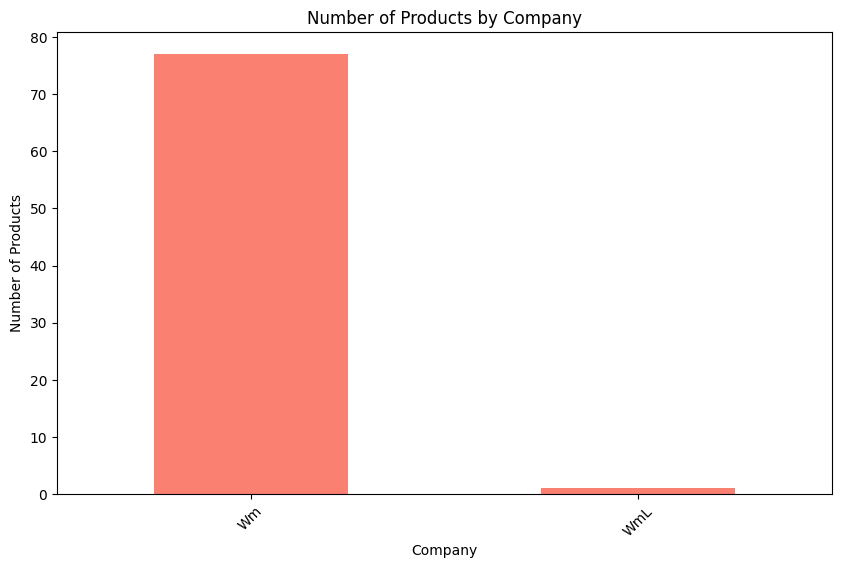

In [64]:
# Assuming 'SKU' contains company information
company_counts = product['SKU'].str.split('-', expand=True)[0].value_counts()

plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar', color='salmon')
plt.title('Number of Products by Company')
plt.xlabel('Company')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


### How has the average product price trended over time?

Explanation: The line graph displays the average price trend of products over the years. An upward trend might indicate inflation or an increase in premium product offerings, while a downward trend could suggest increasing competition or changes in market strategy. The markers and grid enhance visibility and interpretation.

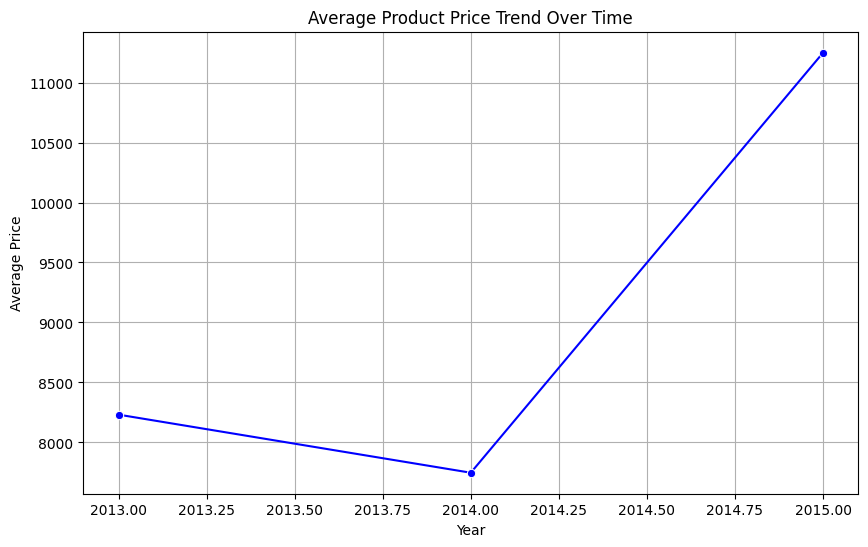

In [60]:
# Assuming 'ReleaseDate' is in datetime format
product['Year'] = pd.to_datetime(product['ReleaseDate']).dt.year
average_price_by_year = product.groupby('Year')['Price'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=average_price_by_year.index, y=average_price_by_year.values, marker='o', color='blue')
plt.title('Average Product Price Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

### What is the distribution of discounted vs. original prices?

Explanation: This histogram overlay provides insight into how discounts are affecting product prices. The kernel density estimate (KDE) gives a smooth representation of the distribution. Overlapping areas suggest price ranges where discounts are most commonly applied. The transparency (alpha setting) helps in comparing the two distributions.

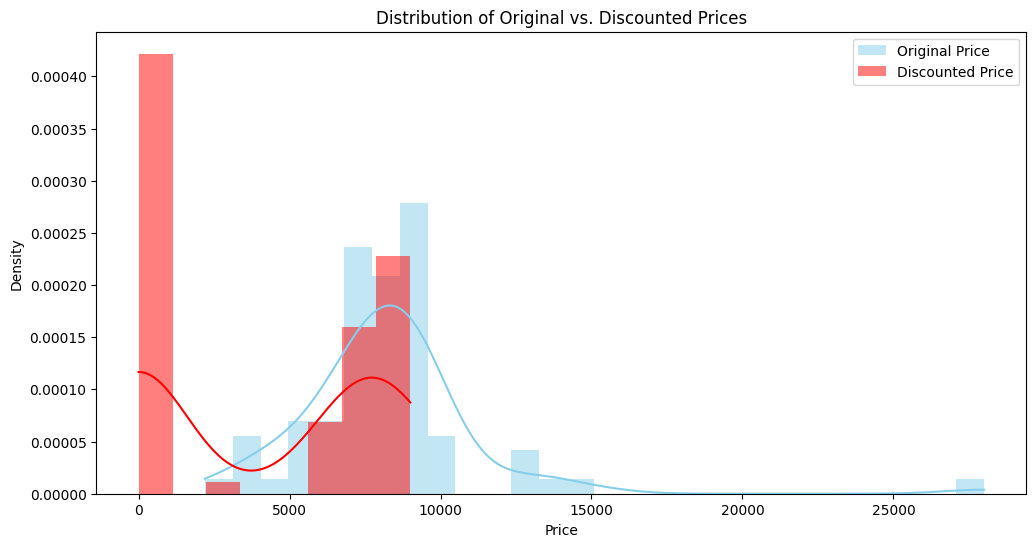

In [61]:
# Ensure both 'Price' and 'DiscountedPrice' are numeric
product[['Price', 'DiscountedPrice']] = product[['Price', 'DiscountedPrice']].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 6))
sns.histplot(product['Price'], color='skyblue', label='Original Price', kde=True, stat="density", linewidth=0)
sns.histplot(product['DiscountedPrice'], color='red', label='Discounted Price', kde=True, stat="density", linewidth=0, alpha=0.5)
plt.title('Distribution of Original vs. Discounted Prices')
plt.xlabel('Price')
plt.legend()
plt.show()


### Which products offer the most significant discounts?

Explanation: This bar plot highlights the top 10 products by discount percentage, offering insights into which products are being heavily discounted. High discounts could be due to inventory clearance, seasonal sales, or other marketing strategies. The coolwarm palette visually distinguishes between the highest and lowest discounts among the top 10.

<ipython-input-62-763ad78b7a72>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




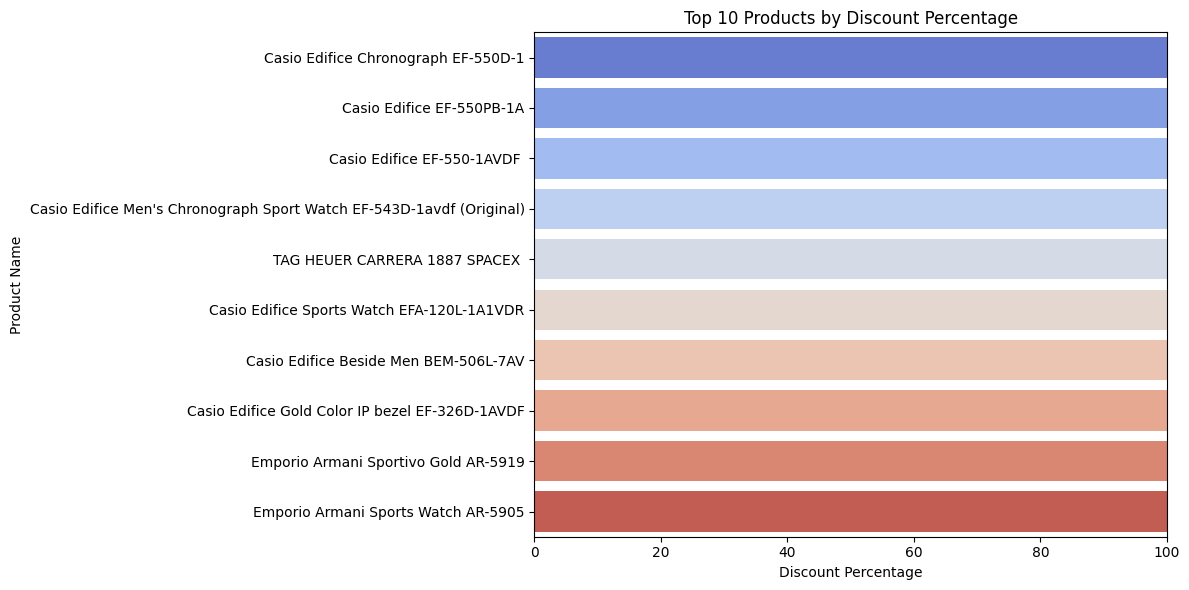

In [62]:
product['DiscountPercentage'] = ((product['Price'] - product['DiscountedPrice']) / product['Price']) * 100
top_discounts = product.nlargest(10, 'DiscountPercentage')

plt.figure(figsize=(12, 6))
sns.barplot(x='DiscountPercentage', y='ProductName', data=top_discounts, palette='coolwarm')
plt.title('Top 10 Products by Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Product Name')
plt.xlim(0, 100)  # Assuming discount percentage cannot exceed 100%
plt.tight_layout()
plt.show()


### What is the relationship between stock level and price?

Explanation: This scatter plot explores the relationship between stock levels and prices, helping identify any correlation between the two variables. A scatter plot is ideal for showcasing relationships between quantitative variables.

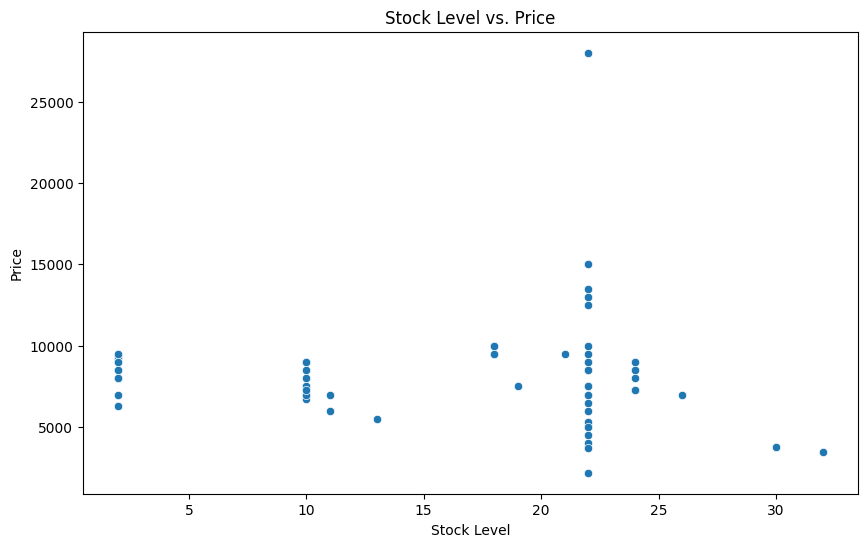

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='StockLevel', y='Price', data=product)
plt.title('Stock Level vs. Price')
plt.xlabel('Stock Level')
plt.ylabel('Price')
plt.show()

### Which products have the highest discount rates?

Explanation: This bar chart highlights the products with the highest discount rates, showcasing how significant discounts are applied to certain products. By sorting and displaying the top 10 products, this visualization provides clear insights into discounting strategies.

<ipython-input-67-f7fd86930f2a>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




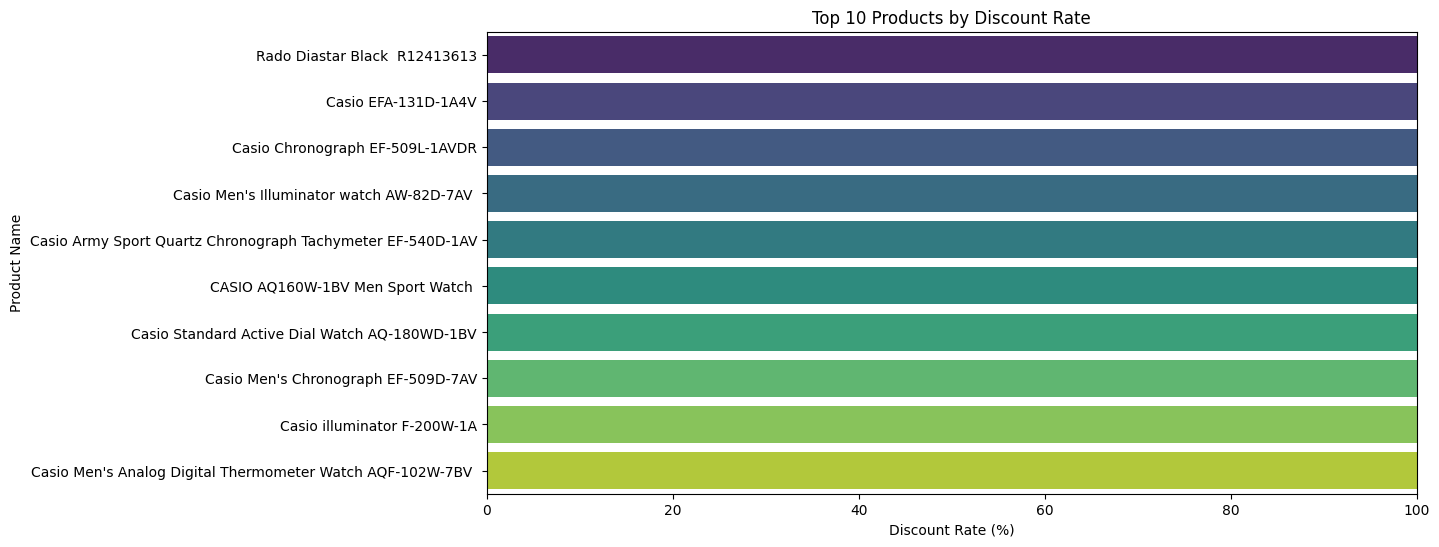

In [67]:
# Calculate discount rate
product['DiscountRate'] = ((product['Price'] - product['DiscountedPrice']) / product['Price']) * 100

# Sort by highest discount rate
top_discounts = product.sort_values(by='DiscountRate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='DiscountRate', y='ProductName', data=top_discounts, palette='viridis')
plt.title('Top 10 Products by Discount Rate')
plt.xlabel('Discount Rate (%)')
plt.ylabel('Product Name')
plt.xlim(0, 100)  # Ensure x-axis is limited to 100% for clarity
plt.show()

### What is the distribution of products by their release year?

Explanation: This bar chart provides a historical perspective on the number of products released each year, indicating periods of high activity or strategic shifts in product development. It visualizes the company's focus on innovation and market demands over time.

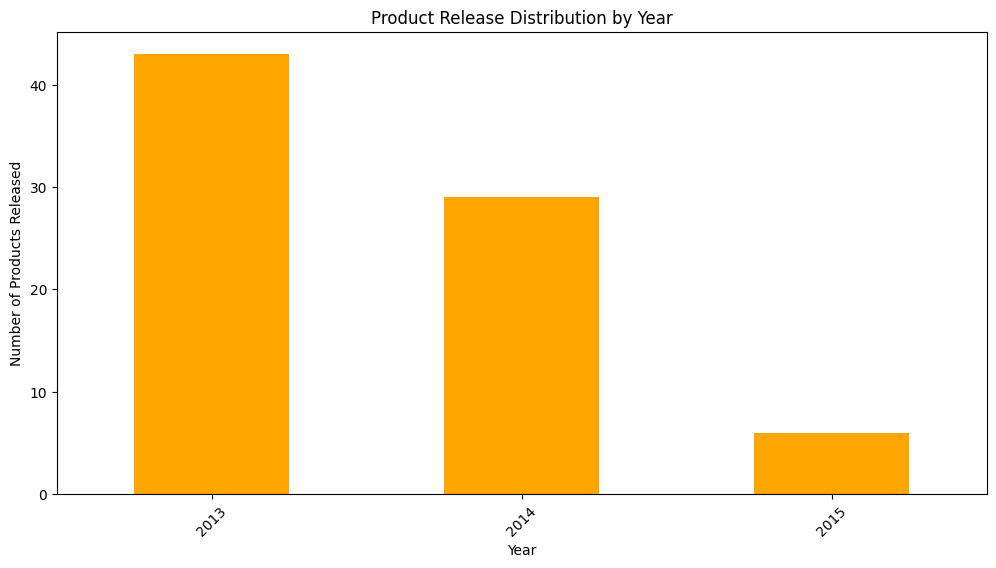

In [68]:
# Assuming 'ReleaseDate' has been converted to datetime and 'Year' has been extracted
release_distribution = product['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
release_distribution.plot(kind='bar', color='orange')
plt.title('Product Release Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Products Released')
plt.xticks(rotation=45)
plt.show()